In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


sdata = pd.read_csv('data/stars/pulsar_stars.csv')

In [2]:
sdata.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
sdata.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

Changing columns names

In [4]:
sdata.rename(columns={' Mean of the integrated profile':'mean_ip',
                      ' Standard deviation of the integrated profile':'std_ip',
                      ' Excess kurtosis of the integrated profile':'excess_ip', 
                      ' Skewness of the integrated profile':'skew_ip',
                      ' Mean of the DM-SNR curve':'mean_dm-snr',
                      ' Standard deviation of the DM-SNR curve':'std_dm-snr',
                      ' Excess kurtosis of the DM-SNR curve':'excess_dm-snr',
                      ' Skewness of the DM-SNR curve':'skew_dm-snr'},
                 inplace=True)

In [5]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
mean_ip          17898 non-null float64
std_ip           17898 non-null float64
excess_ip        17898 non-null float64
skew_ip          17898 non-null float64
mean_dm-snr      17898 non-null float64
std_dm-snr       17898 non-null float64
excess_dm-snr    17898 non-null float64
skew_dm-snr      17898 non-null float64
target_class     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


According to info we have data in all features for all stars

In [6]:
sdata.describe()

,mean_ip,std_ip,excess_ip,skew_ip,mean_dm-snr,std_dm-snr,excess_dm-snr,skew_dm-snr,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


In [7]:
sdata['target_class'].mean()

0.09157447759526204

In data set there are 9,1% pulsar stars

C:\ml\anaconda3\envs\AIU_ML\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ml\anaconda3\envs\AIU_ML\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


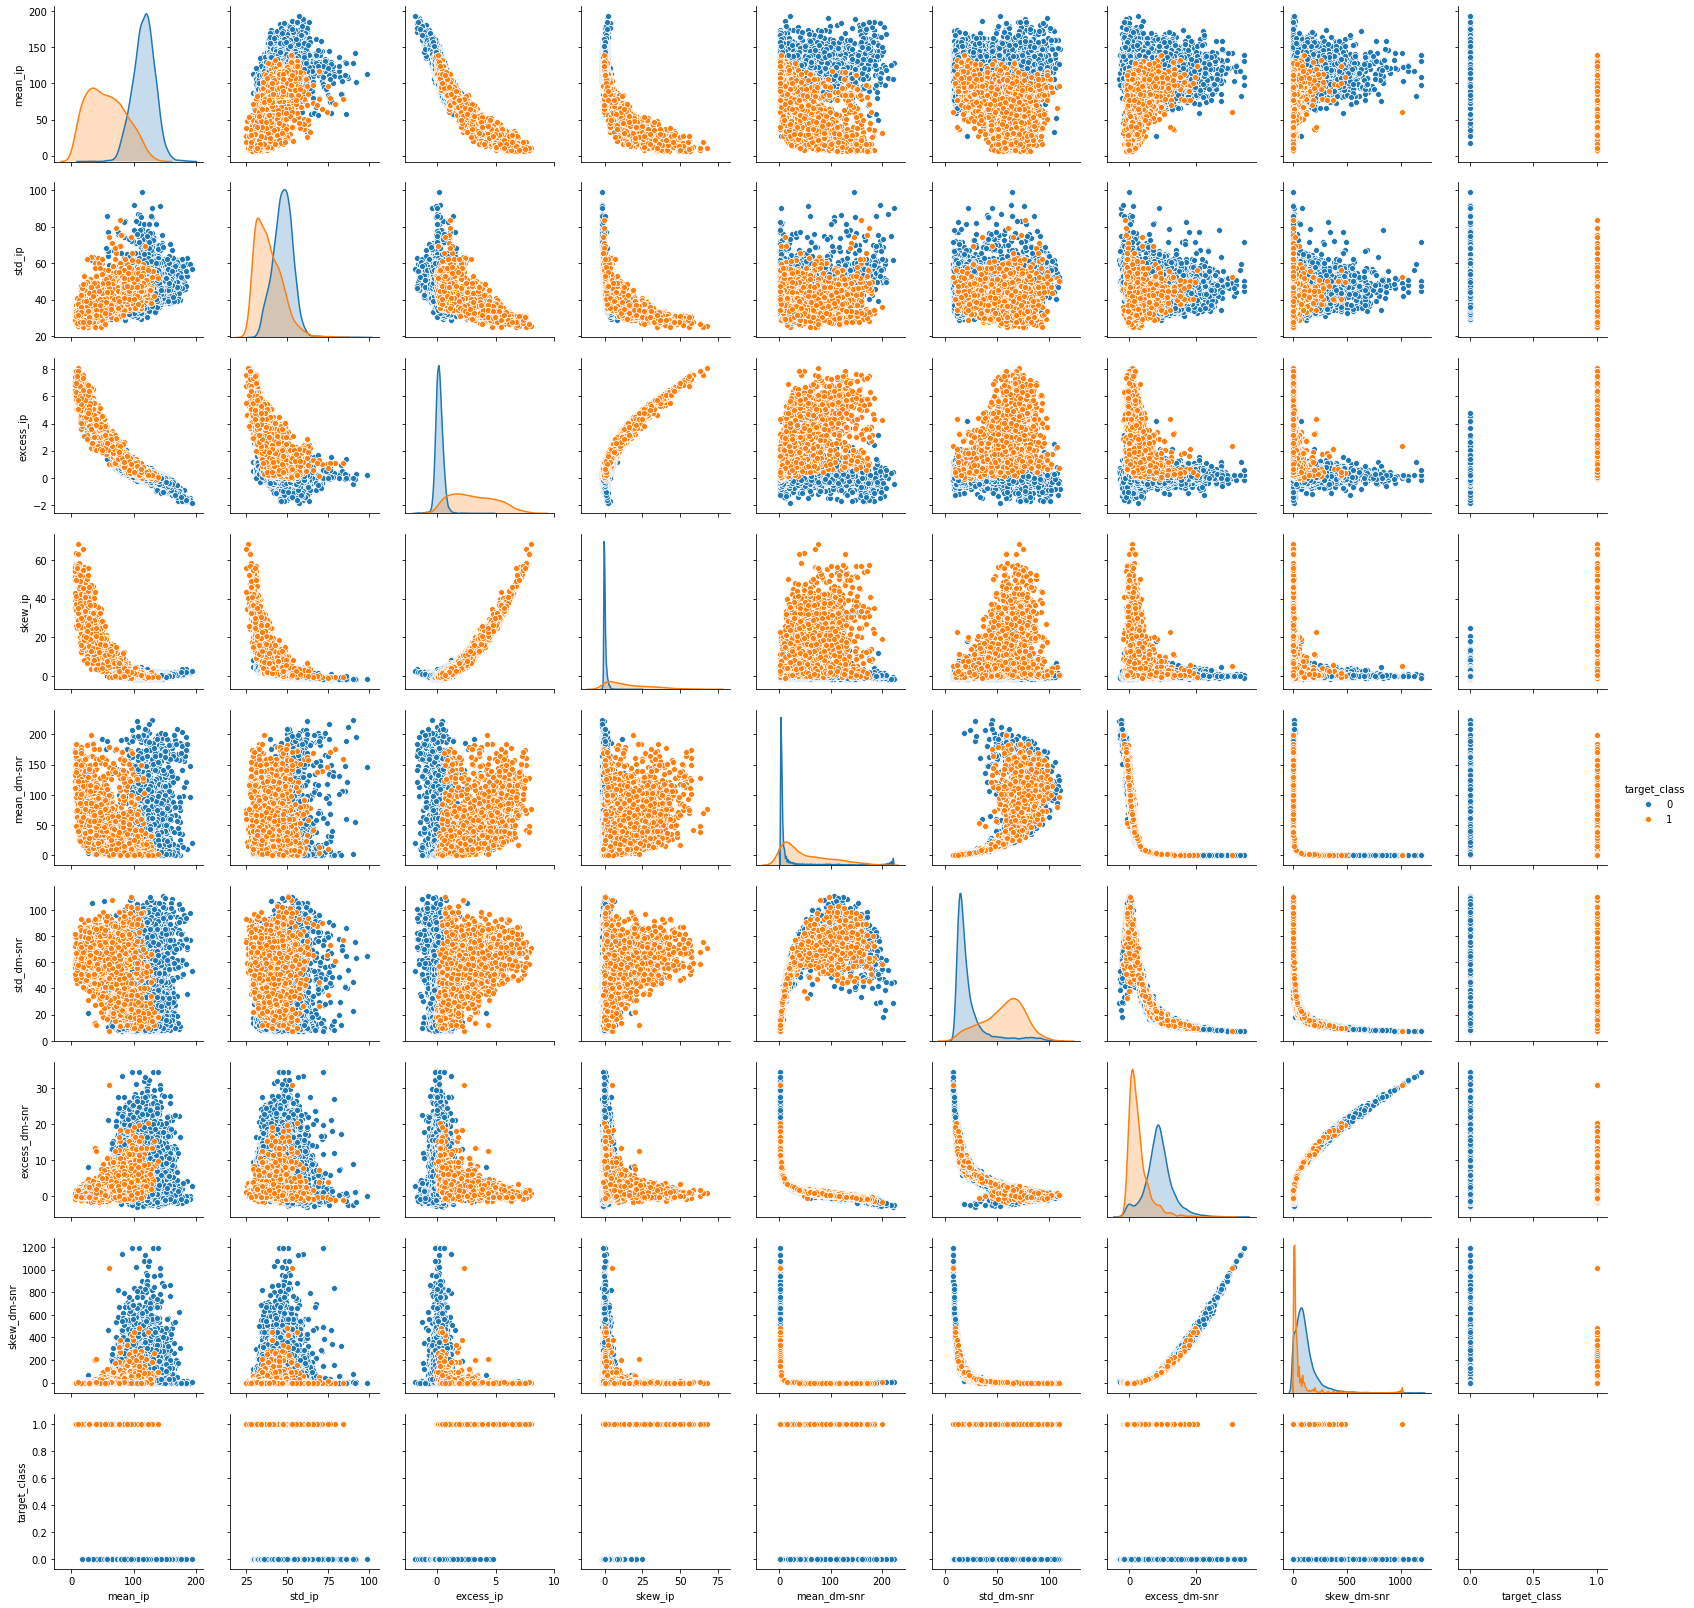

In [8]:
sns.pairplot(sdata, hue="target_class")

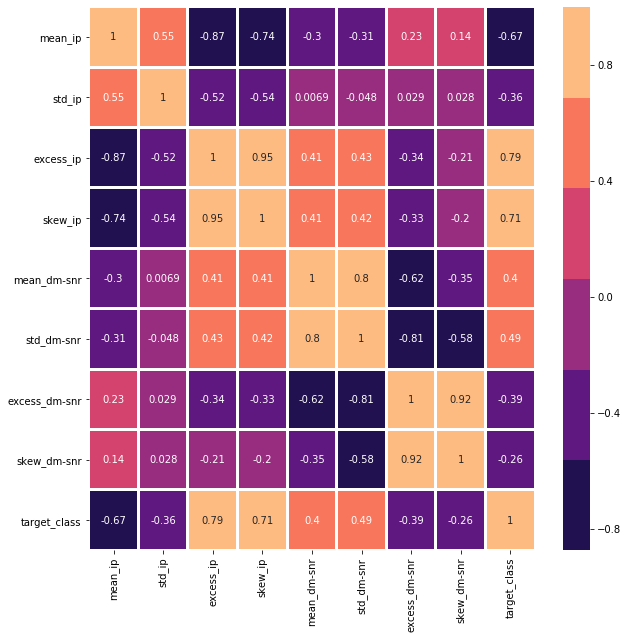

In [9]:
correlation = sdata.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,annot=True,
            cmap=sns.color_palette("magma"),
            linewidth=2,edgecolor="k",ax=ax)

Following heatmap shows correlation between features.

There is a high positive correlation between following features:
    Excess kurtosis of the integrated profile - Skewness of the integrated profile (0.95)
    Mean of the DM-SNR curve - Standard deviation of the DM-SNR curve(0.80)
    Excess kurtosis of the DM-SNR curve - Skewness of the DM-SNR curve (0.92)
There is a high negative correlation between following features:
    Mean of the integrated profile - Excess kurtosis of the integrated profile (-0.87)
    Mean of the integrated profile - Skewness of the integrated profile (-0.74)
    Standard deviation of the DM-SNR curve - Excess kurtosis of the DM-SNR curve (-0.81)

There is a low correlation between following features:
    Standard deviation of the integrated profile - all columns with DM-SNR curve
    Skewness of the DM-SNR curve - Standard deviation of the integrated profile, Excess kurtosis of the integrated profile and Skewness of the integrated profile 

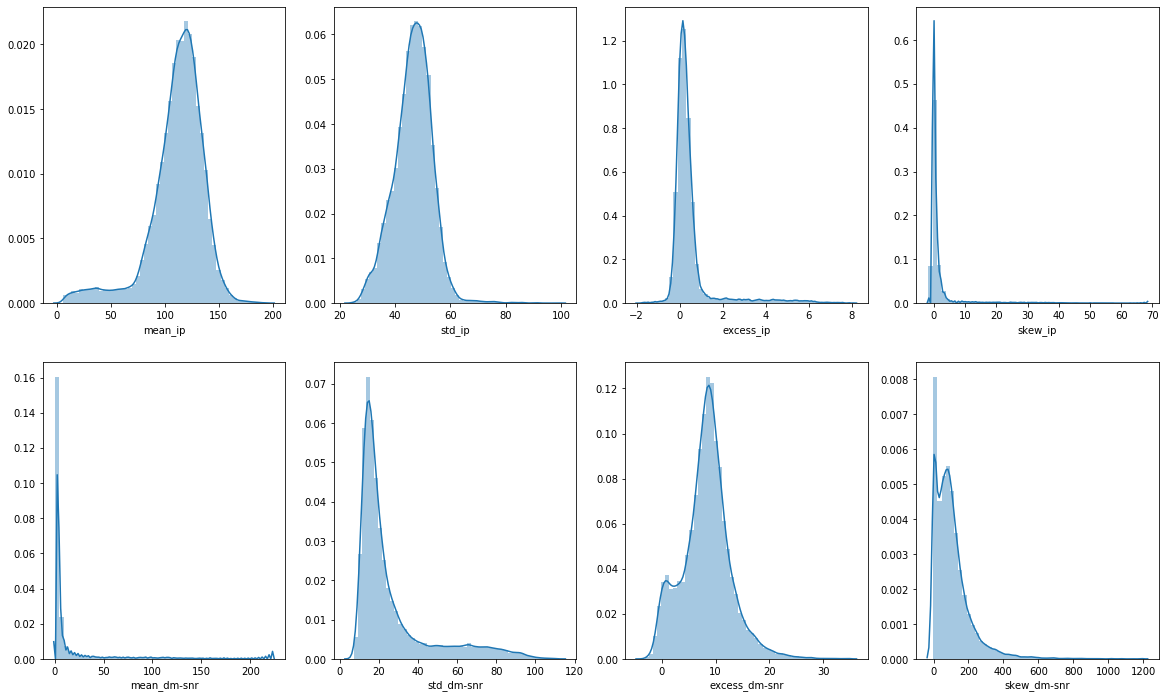

In [10]:
f, axes = plt.subplots(2,4, figsize=(20, 12))
sns.distplot( sdata["mean_ip"], ax=axes[0,0])
sns.distplot( sdata["std_ip"], ax=axes[0,1])
sns.distplot( sdata["excess_ip"], ax=axes[0,2])
sns.distplot( sdata["skew_ip"], ax=axes[0,3])
sns.distplot( sdata["mean_dm-snr"], ax=axes[1,0])
sns.distplot( sdata["std_dm-snr"], ax=axes[1,1])
sns.distplot( sdata["excess_dm-snr"], ax=axes[1,2])
sns.distplot( sdata["skew_dm-snr"], ax=axes[1,3])

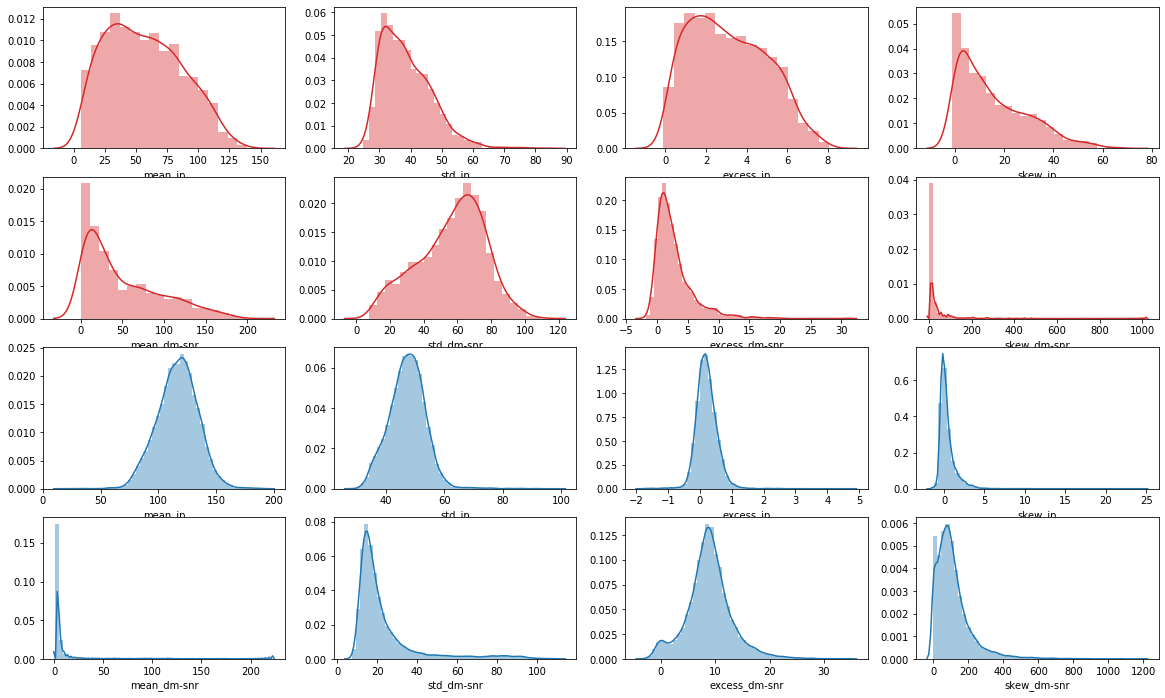

In [11]:
filterStar = sdata["target_class"]==1
filterNotStar = sdata["target_class"]==0
stardata=sdata.loc[sdata['target_class'] == 1]
notStardata=sdata.loc[sdata['target_class'] == 0]
f, axes = plt.subplots(4,4, figsize=(20, 12))
sns.distplot( stardata["mean_ip"], ax=axes[0,0], color="tab:red")
sns.distplot( stardata["std_ip"], ax=axes[0,1], color="tab:red")
sns.distplot( stardata["excess_ip"], ax=axes[0,2], color="tab:red")
sns.distplot( stardata["skew_ip"], ax=axes[0,3], color="tab:red")
sns.distplot( stardata["mean_dm-snr"], ax=axes[1,0], color="tab:red")
sns.distplot( stardata["std_dm-snr"], ax=axes[1,1], color="tab:red")
sns.distplot( stardata["excess_dm-snr"], ax=axes[1,2], color="tab:red")
sns.distplot( stardata["skew_dm-snr"], ax=axes[1,3], color="tab:red")

sns.distplot( notStardata["mean_ip"], ax=axes[2,0])
sns.distplot( notStardata["std_ip"], ax=axes[2,1])
sns.distplot( notStardata["excess_ip"], ax=axes[2,2])
sns.distplot( notStardata["skew_ip"], ax=axes[2,3])
sns.distplot( notStardata["mean_dm-snr"], ax=axes[3,0])
sns.distplot( notStardata["std_dm-snr"], ax=axes[3,1])
sns.distplot( notStardata["excess_dm-snr"], ax=axes[3,2])
sns.distplot( notStardata["skew_dm-snr"], ax=axes[3,3])

Prediction witouth any data adjustment

In [12]:
y = sdata["target_class"].values
sdata.drop(["target_class"],axis=1,inplace=True)
features = sdata.values
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.3, random_state=123, stratify=y)


 accuracy_score : 0.9804469273743017


Text(0.5, 1, 'CONFUSION MATRIX')

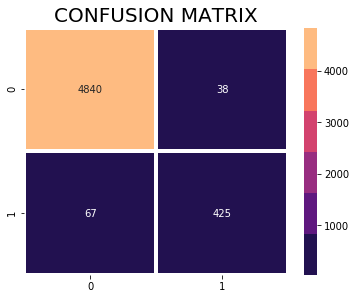

In [13]:
rfc_model = RandomForestClassifier(n_estimators=100,random_state=42,max_leaf_nodes=200,criterion="gini")
rfc_model.fit(X_train,y_train)
predict_rfc = rfc_model.predict(X_test)
rfc_score = rfc_model.score(X_test,y_test)
print ("\n accuracy_score :",rfc_score)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, predict_rfc),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

GradientBoosting


 accuracy_score : 0.9783985102420857


Text(0.5, 1, 'CONFUSION MATRIX')

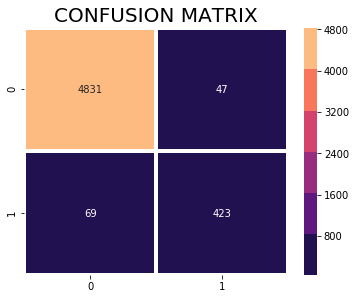

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction = gbc.predict(X_test)
gbc_score = gbc.score(X_test,y_test)
print ("\n accuracy_score :",gbc_score)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, gbc_prediction),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


Create additional train set with removing std_ip and skew_dm-snr

In [15]:
sdata.drop(["std_ip"],axis=1,inplace=True)
sdata.drop(["skew_dm-snr"],axis=1,inplace=True)
features_reduced = sdata.values
Xr_train, Xr_test, yr_train, yr_test = train_test_split(features_reduced, y, test_size = 0.3, random_state=123, stratify=y)


 accuracy_score : 0.9787709497206704


Text(0.5, 1, 'CONFUSION MATRIX')

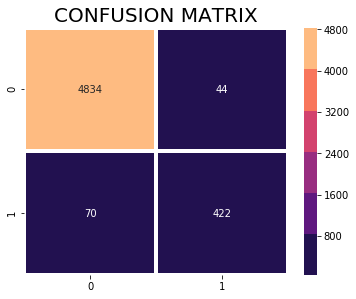

In [16]:
rfc_model = RandomForestClassifier(n_estimators=100,random_state=42,max_leaf_nodes=200,criterion="gini")
rfc_model.fit(Xr_train,yr_train)
predict_rfc_red = rfc_model.predict(Xr_test)
rfc_score_red = rfc_model.score(Xr_test,yr_test)
print ("\n accuracy_score :",rfc_score_red)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(yr_test, predict_rfc_red),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

we've got 2 additional positive results and reduce false negative


 accuracy_score : 0.9761638733705773


Text(0.5, 1, 'CONFUSION MATRIX')

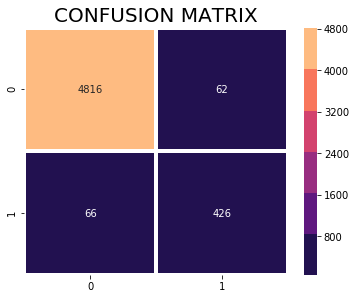

In [17]:
gbc = GradientBoostingClassifier()
gbc.fit(Xr_train,yr_train)
gbc_prediction_red = gbc.predict(Xr_test)
gbc_score = gbc.score(Xr_test,yr_test)
print ("\n accuracy_score :",gbc_score)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(yr_test, gbc_prediction_red),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

Reducing numbers of features in common increase false positives results and don't give possitive effect

Prediction with data normalization. Try to normalize data with MinMax Scaler (Standard scaler hasn't give any result)


 accuracy_score : 0.9802607076350093


Text(0.5, 1, 'CONFUSION MATRIX')

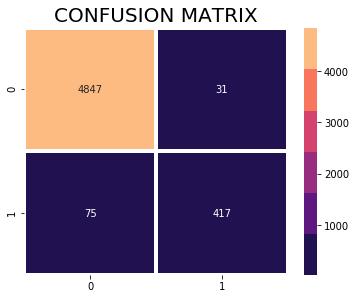

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
Xs_train = scaler.fit_transform(X_train)
Xs_test = scaler.fit_transform(X_test)


rfc_model = RandomForestClassifier(n_estimators=100,random_state=42,max_leaf_nodes=200,criterion="gini")
rfc_model.fit(Xs_train,y_train)
predict_rfc = rfc_model.predict(Xs_test)
rfc_score = rfc_model.score(Xs_test,y_test)
print ("\n accuracy_score :",rfc_score)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, predict_rfc),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)


 accuracy_score : 0.9783985102420857


Text(0.5, 1, 'CONFUSION MATRIX')

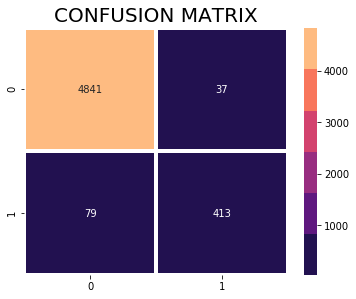

In [19]:
gbc = GradientBoostingClassifier()
gbc.fit(Xs_train,y_train)
gbc_prediction = gbc.predict(Xs_test)
gbc_score = gbc.score(Xs_test,y_test)
print ("\n accuracy_score :",gbc_score)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, gbc_prediction),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)




 accuracy_score : 0.9787709497206704


Text(0.5, 1, 'CONFUSION MATRIX')

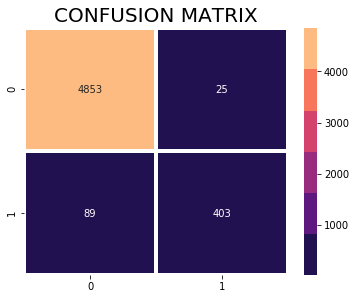

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ada_normS_model = AdaBoostClassifier()
ada_normS_model.fit(Xs_train,y_train)
yada_normS_head_rfc = ada_normS_model.predict(Xs_test)
ada_norms_score = ada_normS_model.score(Xs_test,y_test)

print ("\n accuracy_score :",ada_norms_score)

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, yada_normS_head_rfc),annot=True,fmt = "d",linecolor="w", cmap=sns.color_palette("magma"),linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)